## USC Grad School Part Time Technical Test 1

In [32]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Divvy_Trips_2020_Q1-Copy1.csv")

In [33]:
#!pip install sqlalchemy PyMySQL --quiet

In [34]:
from sqlalchemy import create_engine
from getpass import getpass
password = getpass()
engine = create_engine('mysql+pymysql://root:{}@localhost:3306/cycle'.format(password))

········


In [96]:
query = "SELECT * FROM offices;"
office_df = pd.read_sql(query, engine)
query = "SELECT * FROM employees;"
em_df = pd.read_sql(query, engine)
query = "SELECT * FROM payments;"
pay_df = pd.read_sql(query, engine)
query = "SELECT * FROM productlines;"
pdl_df = pd.read_sql(query, engine)
query = "SELECT * FROM customers;"
cus_df = pd.read_sql(query, engine)

In [47]:
# Function to standardize column names
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespaces
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)  # Replace spaces with underscores
df.columns = df.columns.str.replace(r'[^\w_]', '', regex=True)  # Remove any non-word characters except underscore

# Now the column names will be standardized
print(df.columns)

Index(['officecode', 'city', 'phone', 'addressline1', 'addressline2', 'state',
       'country', 'postalcode', 'territory', 'officelocation'],
      dtype='object')


In [60]:
office_df.sort_values(by = ["country", "state", "city"])

,officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory,officeLocation
5,6,Sydney,+61 2 9264 2451,5-11 Wentworth Avenue,Floor #2,NSW,Australia,2010,APAC,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00m\x1a\xd...
3,4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00\xb8\x91...
4,5,Tokyo,+81 33 224 5000,4-1 Kioicho,None,Chiyoda-Ku,Japan,102-8578,Japan,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00N\x0e\x9...
6,7,London,+44 20 7877 2041,25 Old Broad Street,Level 7,None,UK,EC2N 1HN,EMEA,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00/\xf7\xc...
0,1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00\xd3\xda...
1,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00\xc4\x0b...
2,3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00-\xea\x9...


In [61]:
em_df.count()

employeeNumber    23
lastName          23
firstName         23
extension         23
email             23
reportsTo         22
jobTitle          23
officeCode        23
dtype: int64

In [66]:
pay_df["amount"].sum().round()

8853839.0

In [76]:
pdl_df[pdl_df['productLine'].str.contains('.*Cars.*', na=False, regex=True)]


,productLine,textDescription,htmlDescription,image
0,Classic Cars,Attention car enthusiasts: Make your wildest c...,None,None
6,Vintage Cars,Our Vintage Car models realistically portray a...,None,None


In [85]:
pay_df.head()

,checkNumber,paymentDate,amount,customerNumber
0,AB661578,2004-07-28,9415.13,471
1,AD304085,2003-10-24,36798.88,299
2,AD832091,2004-09-09,1960.80,172
3,AE192287,2005-03-10,23602.90,186
4,AE215433,2005-03-05,101244.59,124


In [87]:
date = pd.to_datetime('2004-10-28')

In [89]:
date = pd.to_datetime('2004-10-28')
mask = pay_df["paymentDate"] == date
pay_df = pay_df[mask]

In [93]:
pay_df

,checkNumber,paymentDate,amount,customerNumber
0,AB661578,2004-07-28,9415.13,471
1,AD304085,2003-10-24,36798.88,299
2,AD832091,2004-09-09,1960.80,172
3,AE192287,2005-03-10,23602.90,186
4,AE215433,2005-03-05,101244.59,124
...,...,...,...,...
268,PJ434867,2004-04-14,31670.37,412
269,PN238558,2003-12-05,55425.77,363
270,PO860906,2004-01-31,7310.42,489
271,PQ803830,2004-12-24,39440.59,323


In [120]:
cus_df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,customerLocation
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00]\xa5\xb...
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00o\x0e\xd...
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00\xe3\x16...
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00]\xa5\xb...
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.0,"b""\xe6\x10\x00\x00\x01\x01\x00\x00\x00\x12\xd4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,None,Philadelphia,PA,71270,USA,1323.0,72600.0,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00s\x9c\xd...
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,None,Brisbane,CA,94217,USA,1165.0,60300.0,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00\xa2\x9b...
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501.0,43300.0,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00\xdb I\x...
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,None,Boston,MA,51003,USA,1188.0,85100.0,b'\xe6\x10\x00\x00\x01\x01\x00\x00\x00X\xcb\xf...


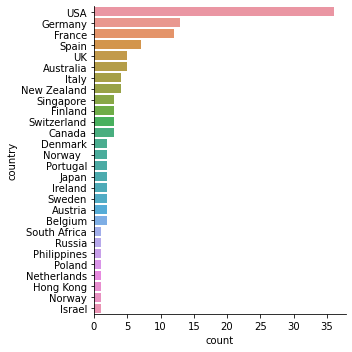

In [107]:
country_counts = cus_df['country'].value_counts()
sorted_order = cus_df['country'].value_counts().index
sb.catplot(y = "country", data = cus_df, kind = "count", order = sorted_order)

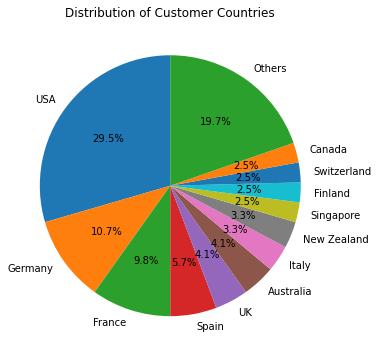

In [112]:
# Assuming cus_df is your DataFrame
# Calculate the percentage of each country
country_counts = cus_df['country'].value_counts()
total = country_counts.sum()
percentages = (country_counts / total) * 100

# Separate countries into those above and below 5%
threshold = 2
above_threshold = percentages[percentages >= threshold]
below_threshold = percentages[percentages < threshold]

# Add an "Others" category for countries below 5%
others = below_threshold.sum()
final_counts = above_threshold.append(pd.Series(others, index=['Others']))

# Sorted order for the pie chart
sorted_order = final_counts.index

# Plot the pie chart with the "Others" category
plt.figure(figsize=(6, 6))
plt.pie(final_counts, labels=sorted_order, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Countries')
plt.show()

In [116]:
pay_df["amount"].describe()

count       273.000000
mean      32431.645531
std       20997.116917
min         615.450000
25%       16909.840000
50%       32077.440000
75%       45352.470000
max      120166.580000
Name: amount, dtype: float64

In [118]:
df = pd.merge(pay_df, cus_df, how = "inner", on = "customerNumber")

In [124]:
df = df[["amount", "country"]]

In [126]:
pt = df.pivot_table(index = ["country"], values = ["amount"], aggfunc = "mean")

In [134]:
pt = pt.sort_values("amount").reset_index()

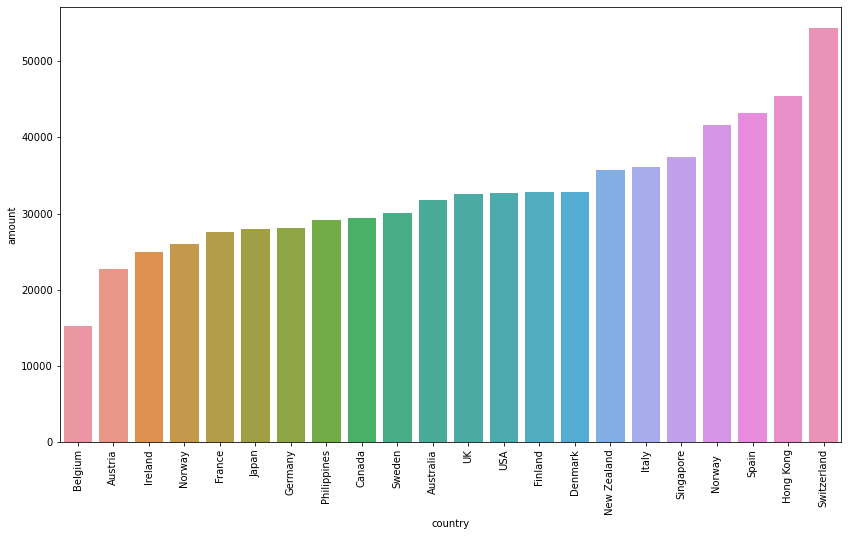

In [138]:
# Set the figure size
plt.figure(figsize=(14, 8))  # Width: 14, Height: 8 (adjust as needed)

# Create the barplot
sb.barplot(data=pt, x='country', y='amount')
# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)
# Display the plot
plt.show()